<a href="https://colab.research.google.com/github/cuie23/learning-pytorch/blob/main/torch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split


## Binary Classification

In [53]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

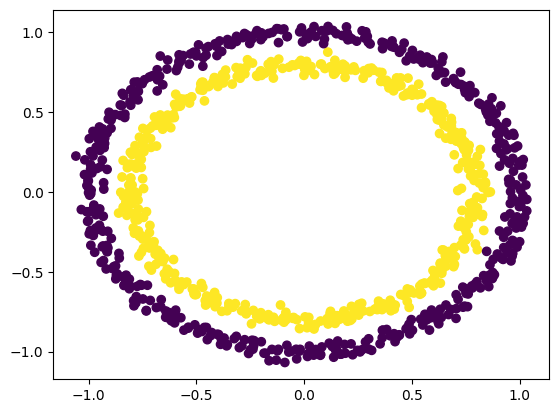

In [54]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Create linear layers - 2-5-1
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #return self.layer_2(self.layer_1(x))
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [137]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

In [138]:
model = CircleModel()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [139]:
torch.manual_seed(42)

epochs = 2000

for epoch in range(epochs):
  # Training
  model.train()

  y_probs = model(X_train).squeeze() # reshape
  y_pred = torch.round(torch.sigmoid(y_probs))
  #y_pred = torch.round(y_probs)


  loss = loss_fn(y_probs, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_probs = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_probs))
    #test_preds = torch.round(test_probs)

    test_loss = loss_fn(test_probs, y_test)
    test_acc = accuracy_fn(y_pred = test_preds, y_true = y_test)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test loss: 0.62145, Test acc: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 1100 | Loss: 0.48153, Accuracy: 93.50% | Test loss: 0.49935, Test acc:

In [140]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


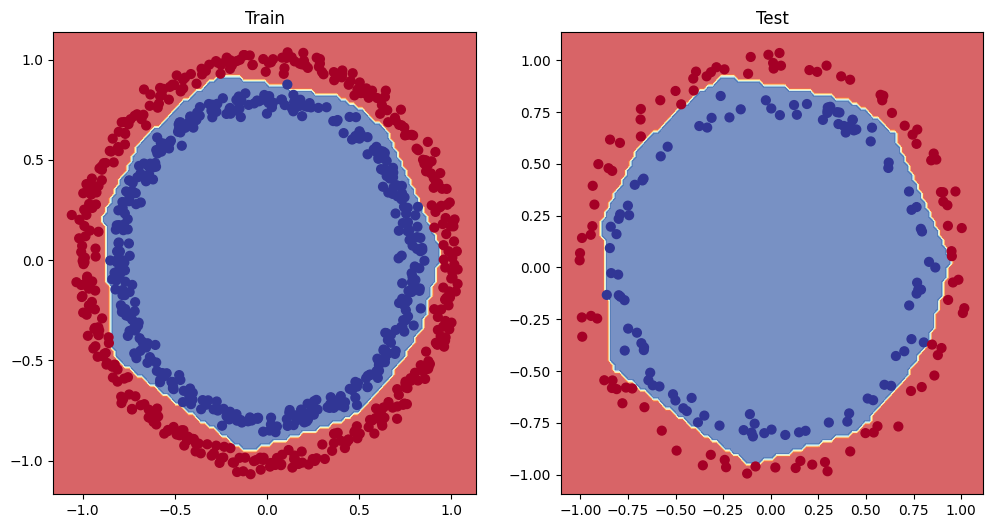

In [141]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

## Multi-Classification

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


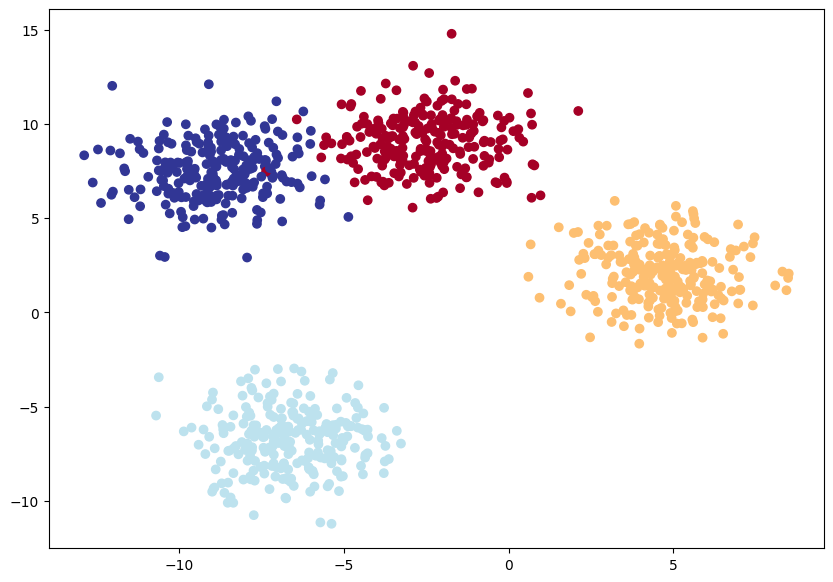

In [144]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [147]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    # Create linear layers - 2-5-1
    self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [149]:
model0 = BlobModel(NUM_FEATURES, NUM_CLASSES)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.1)

In [153]:
torch.manual_seed(RANDOM_SEED)

epochs = 200

for epoch in range(epochs):

  model0.train()
  y_blob_probs = model0.forward(X_blob_train)
  y_blob_pred = torch.softmax(y_blob_probs, dim=1).argmax(dim=1)

  loss = loss_fn(y_blob_probs, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_blob_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_blob_probs = model0(X_blob_test)
    test_blob_pred = torch.softmax(test_blob_probs, dim=1).argmax(dim=1)
    # 2. Calculate test loss and accuracy
    test_loss = loss_fn(test_blob_probs, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                            y_pred=test_blob_pred)

  # Print out what's happening
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.02091, Acc: 99.50% | Test Loss: 0.00937, Test Acc: 99.50%
Epoch: 10 | Loss: 0.02090, Acc: 99.50% | Test Loss: 0.00935, Test Acc: 99.50%
Epoch: 20 | Loss: 0.02088, Acc: 99.50% | Test Loss: 0.00933, Test Acc: 99.50%
Epoch: 30 | Loss: 0.02086, Acc: 99.50% | Test Loss: 0.00931, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02084, Acc: 99.50% | Test Loss: 0.00929, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02082, Acc: 99.50% | Test Loss: 0.00927, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02081, Acc: 99.50% | Test Loss: 0.00925, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02079, Acc: 99.50% | Test Loss: 0.00924, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02077, Acc: 99.50% | Test Loss: 0.00922, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02075, Acc: 99.50% | Test Loss: 0.00920, Test Acc: 99.50%
Epoch: 100 | Loss: 0.02074, Acc: 99.50% | Test Loss: 0.00918, Test Acc: 99.50%
Epoch: 110 | Loss: 0.02072, Acc: 99.50% | Test Loss: 0.00916, Test Acc: 99.50%
Epoch: 120 | Loss: 0.02070, Acc: 99.50% | Test Loss: 0.00914, T

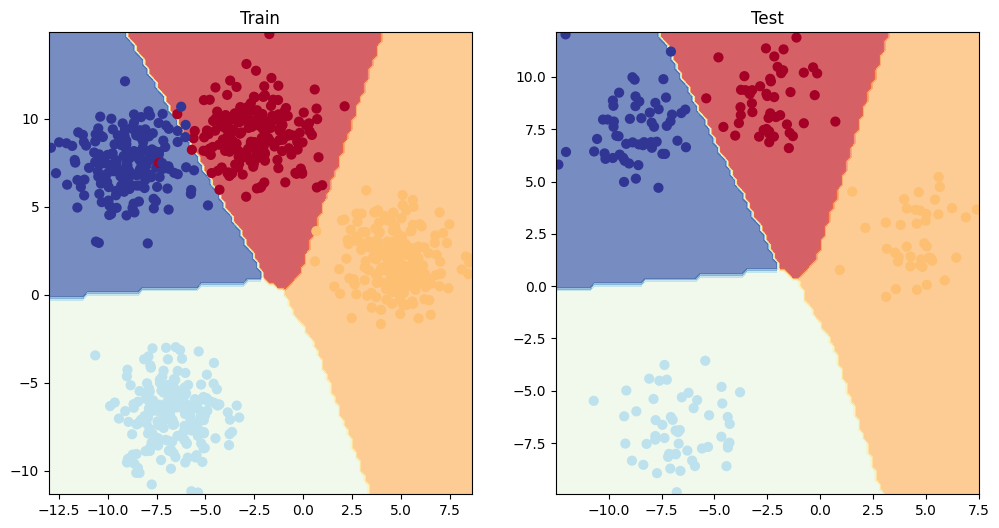

In [154]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_blob_test, y_blob_test)